<a href="https://colab.research.google.com/github/Hf301/Hf301/blob/main/GroupProject_1_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
from IPython.core.pylabtools import figsize
%matplotlib inline

# Визуальный анализ рейтингов шоу Netflix
<img src="https://pp.userapi.com/c854528/v854528797/c62ce/FiPEibYUxJc.jpg" width="40%">

Netflix за последние 5-10 лет обзавелись большим количеством зрителей. С увеличением числа зрителей увеличилось и разнообразие шоу. Соответственно, перед аналитиками из киноиндустрии встала задача исследования данных с рейтингами различных сериалов.  
В данном задании вам предстоит провести визуальный анализ датасета **1000 Netflix Shows** (по состоянию на 11.06.2017) и сделать выводы.  



### Описание признаков:
* `title` - название шоу.
* `rating` - рейтинг шоу. Например: G, PG, TV-14, TV-MA.
* `ratingLevel` - описание рейтинговой группы и особенностей шоу.
* `ratingDescription` - рейтинг шоу, закодированный в числом.
* `release year` - год выпуска шоу.
* `user rating score` - оценка пользователей.
* `user_rating_size` - общий рейтинг пользователей.

## Решение

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving NetflixShows.csv to NetflixShows.csv


In [ ]:
data = pd.read_csv("NetflixShows.csv", encoding='cp437')
del data['ratingDescription'], data['user rating size']
# data

In [ ]:
data.columns = data.columns.str.replace('\s+', '_',regex=True) # для удобства доступа через точку уберем пробелы из названия колонок

In [ ]:
data = data.drop_duplicates(keep='last')
# половина составляет полные дубликаты, возникшие скорее всего при сборе и обобщении данных.
# data

In [ ]:
_,_,a,_,b = data.isna().sum().items()
print(f'Незаполненных значений {a[0]} - {a[1]}, {b[0]} - {b[1]}')

Незаполненных значений ratingLevel - 33, user_rating_score - 244


In [ ]:
!pip3 install pandas-profiling==3.1.0
from pandas_profiling import ProfileReport
profile_final = ProfileReport(data, explorative=True, minimal=True)
profile_final.to_notebook_iframe() # получаем много информации: уникальные, пропущенные, среднее и тд.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
profile_final = ProfileReport(data.dropna(), explorative=True, minimal=True)
profile_final.to_notebook_iframe() # просто удалив пропуски потеряем много данных

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# по title distinct = 496, остается 4 шоу с дублирующимися названиями, видимо ремейки
# естественно, дублируется большая часть рейтингов, всего 13 разных групп
# значительная часть данных так же дублируется в других группах. Разных годов всего 35, описаний - 99
# хорошо бы избавиться от рейтинговых описаний, содержащих по 1 шоу, переместив их в подобные рейтинговые группы

In [ ]:
# print(f"Различных рейтинговых групп {data[data.duplicated(subset=['rating'], keep = 'last')==False].shape[0]}")
print(f"Различных рейтинговых групп {data.rating.unique().shape[0]}")

Различных рейтинговых групп 13


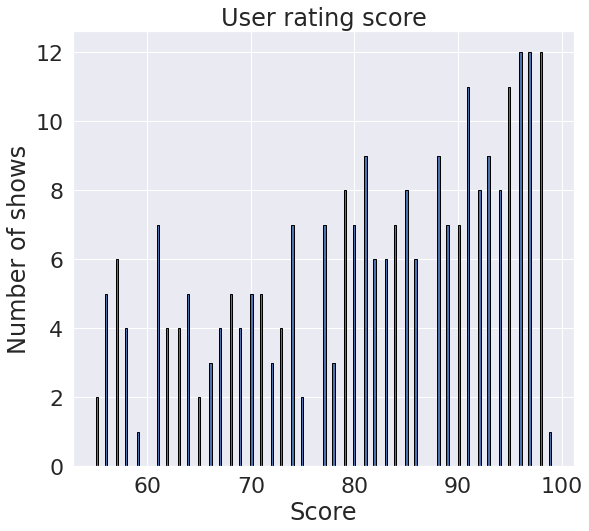

In [ ]:
plt.rcParams['font.size'] = 24

pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', 60)

sns.set(font_scale = 2)
figsize(8, 8)
plt.hist(data['user_rating_score'], bins = 200, edgecolor = 'black')

plt.xlabel('Score')
plt.ylabel('Number of shows')
plt.title('User rating score')
plt.style.use('fivethirtyeight')

In [ ]:
df = data.user_rating_score.dropna()
print(f'{"Оценок": <9} {len(data.user_rating_score.unique())}')
print(f'{"Медиана": <10}{data.user_rating_score.median():0.0f}') # middle value of axis # значение ровно по середине
print(f'{"Среднее": <10}{sum(df) / len(df):0.6f}') # sum/len
data.user_rating_score.describe()

Оценок    43
Медиана   84
Среднее   81.398438


count    256.000000
mean      81.398438
std       12.730904
min       55.000000
25%       71.000000
50%       83.500000
75%       93.000000
max       99.000000
Name: user_rating_score, dtype: float64

### Годы когда были запущены шоу, представленные в датасете.

In [ ]:
years = data.release_year.unique()
print(*sorted(years), sep=', ') 

1940, 1976, 1978, 1982, 1986, 1987, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017


### График, показывающий распределение количества запущенных шоу в зависимости от года.

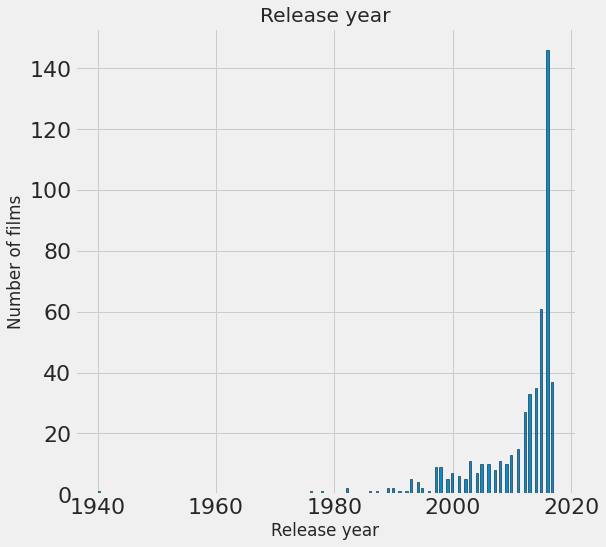

In [ ]:
plt.hist(data['release_year'], bins = 200, edgecolor = 'black')

plt.xlabel('Release year')
plt.ylabel('Number of films')
plt.title('Release year')
plt.style.use('fivethirtyeight')

# 1940 находится далеко от основной части, 2016 содержит 30% выборки, 2017 неполный

In [ ]:
print(f'Фильмов 1940-го года - {(data[data.release_year == 1940]).count()[0]}, \nфильмов 2016-го года - {(data[data.release_year == 2016]).count()[0]}.')
# (data.release_year).value_counts() # кол-во фильмов по годам

Фильмов 1940-го года - 1, 
фильмов 2016-го года - 146.


### Сравним среднюю оценку пользователей в 2016 со средней оценкой в 2017. 



In [ ]:
years = data.groupby('release_year').mean() # первый вариант
print(f'Cредняя оценка пользователей в 2016 - {years.loc[2016][0]:0.3f}, \nсредняя оценка пользователей в 2017 - {years.loc[2017][0]}.')

Cредняя оценка пользователей в 2016 - 84.314, 
средняя оценка пользователей в 2017 - 88.125.


In [ ]:
mean_16 = data[data['release_year'] == 2016]['user_rating_score'].mean() # второй вариант
mean_17 = data[data['release_year'] == 2017]['user_rating_score'].mean()
print(f'Средняя оценка пользователей в 2016 - {mean_16:0.3f}, \ncредняя оценка пользователей в 2017 - {mean_17}.')
count_16 = (data[data['release_year'] == 2016]).count()[0]
count_17 = (data[data['release_year'] == 2017]).count()[0]
print(f'Фильмов 2016-го года - {count_16}, \nфильмов 2017-го года - {count_17}.')

Средняя оценка пользователей в 2016 - 84.314, 
cредняя оценка пользователей в 2017 - 88.125.
Фильмов 2016-го года - 146, 
фильмов 2017-го года - 37.


In [ ]:
mean_16 = dd[dd['release_year'] == 2016]['user_rating_score'].mean() # второй вариант
mean_17 = dd[dd['release_year'] == 2017]['user_rating_score'].mean()
print(f'Средняя оценка пользователей в 2016 - {mean_16:0.3f}, \ncредняя оценка пользователей в 2017 - {mean_17}.')
count_16 = (dd[dd['release_year'] == 2016]).count()[0]
count_17 = (dd[dd['release_year'] == 2017]).count()[0]
print(f'Фильмов 2016-го года - {count_16}, \nфильмов 2017-го года - {count_17}.')

Средняя оценка пользователей в 2016 - 85.061, 
cредняя оценка пользователей в 2017 - 87.0.
Фильмов 2016-го года - 82, 
фильмов 2017-го года - 10.


### Распределение пользователей по рейтинговым группам.

(-1.1589862902864314, 1.154916689466574, -1.163866180813728, 1.171521726368732)

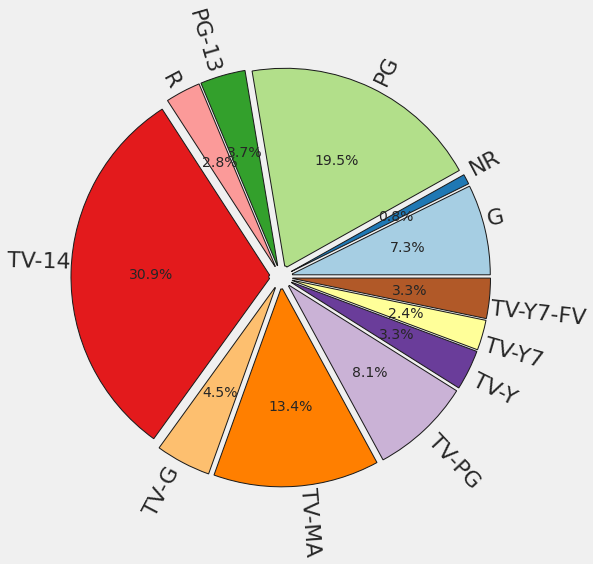

In [ ]:
df = data.groupby('rating').size()
fig, ax = plt.subplots()
ax.pie(df.values, # значения 
       labels=df.index, # подписи
       explode = [0.05 for i in range(len(df.values))], # пробелы между долями
       autopct='%1.1f%%', # проценты на долях
       labeldistance=1, # отступ подписей от долей
       textprops={}, # свойства текста 'size' и тп
       colors=plt.get_cmap("Paired")([i for i in range(len(df.values))]), # цвет долей
       wedgeprops={ 'lw':1, 'ls':'-','edgecolor':"k", 'width':0.99}, # свойства долей
       rotatelabels=True) # поворот подписей долей
ax.axis("equal")

### Выбираем любое из представленных шоу и составляем его описательный портрет.

In [ ]:
ur = data[data['rating'] == 'UR']
rl = ur['ratingLevel'].item()
tl =  ur['title'].item()
print(f'Film "{tl}"". {rl}') 
# рейтинг с единственным шоу

Film "White Girl"". This movie has not been rated. Intended for adults only and may contain sex, violence, drugs, language or other adult themes.


In [ ]:
# 'TV-14' содержит только 'Parents strongly cautioned', nan можно заполнить таким же
data[data['rating'] == 'TV-14'].ratingLevel.unique()
data[data.ratingLevel == 'dialogue, language, sexual situations and violence'] # по смыслу то же самое, можно обработать как выброс

,title,rating,ratingLevel,release_year,user_rating_score
412,Hawaii Five-0,TV-14,"dialogue, language, sexual situations and viol...",2016,96.0


In [ ]:
print(f'Рейтинговая группа PG содержит {len(data[data.rating == "PG"].ratingLevel.unique())} рейтинговых описаний из {len(data[data.rating == "PG"])} отличаются, чем заполнять пропущенные?') 
# data[data.rating == 'PG']

Рейтинговая группа PG содержит 63 рейтинговых описаний из 76 отличаются, чем заполнять пропущенные?


In [ ]:
data[data['release_year'] == 1991]
# обычное шоу, всего одно в году, какой выставим рейтинг при заполнении nan?

,title,rating,ratingLevel,release_year,user_rating_score
971,An American Tail: Fievel Goes West,G,General Audiences. Suitable for all ages.,1991,NaN


In [ ]:
data[data.release_year == 1940] # самое древнее шоу, видимо не самое успешное

,title,rating,ratingLevel,release_year,user_rating_score
907,Fantasia,G,General Audiences. Suitable for all ages.,1940,61.0


In [ ]:
data[data['ratingLevel'].isna()][data['user_rating_score'].isna()].sample() # заменить на merge
# Рост пропущенных значений оценки и рейтинового уровня с годом.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,title,rating,ratingLevel,release_year,user_rating_score
190,Hurricane Bianca,TV-MA,NaN,2016,NaN


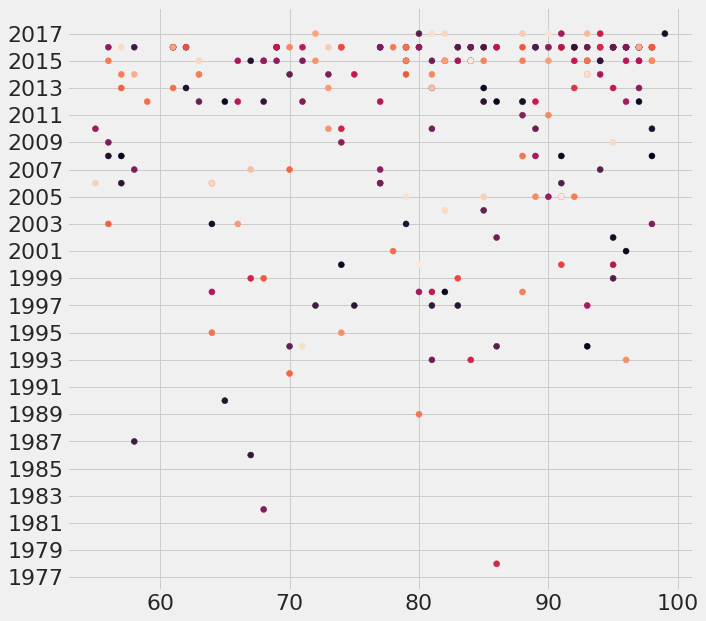

In [ ]:
plt.figure(figsize=(10,10))
plt.yticks(np.arange(1975, 2019, 2))
plt.scatter(data[data.release_year>1940].dropna()['user_rating_score'], data[data.release_year>1940].dropna()['release_year'], c=np.random.rand(data[data.release_year>1940].dropna()['ratingLevel'].shape[0]))
plt.show()

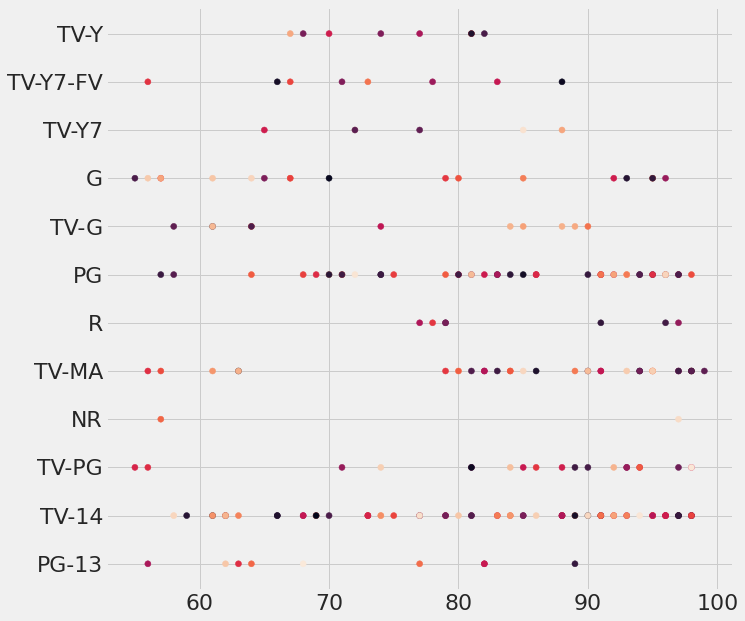

In [ ]:
plt.figure(figsize=(10,10))

plt.scatter(data.dropna()['user_rating_score'], data.dropna()['rating'], c=np.random.rand(data.dropna()['ratingLevel'].shape[0]))
plt.show()

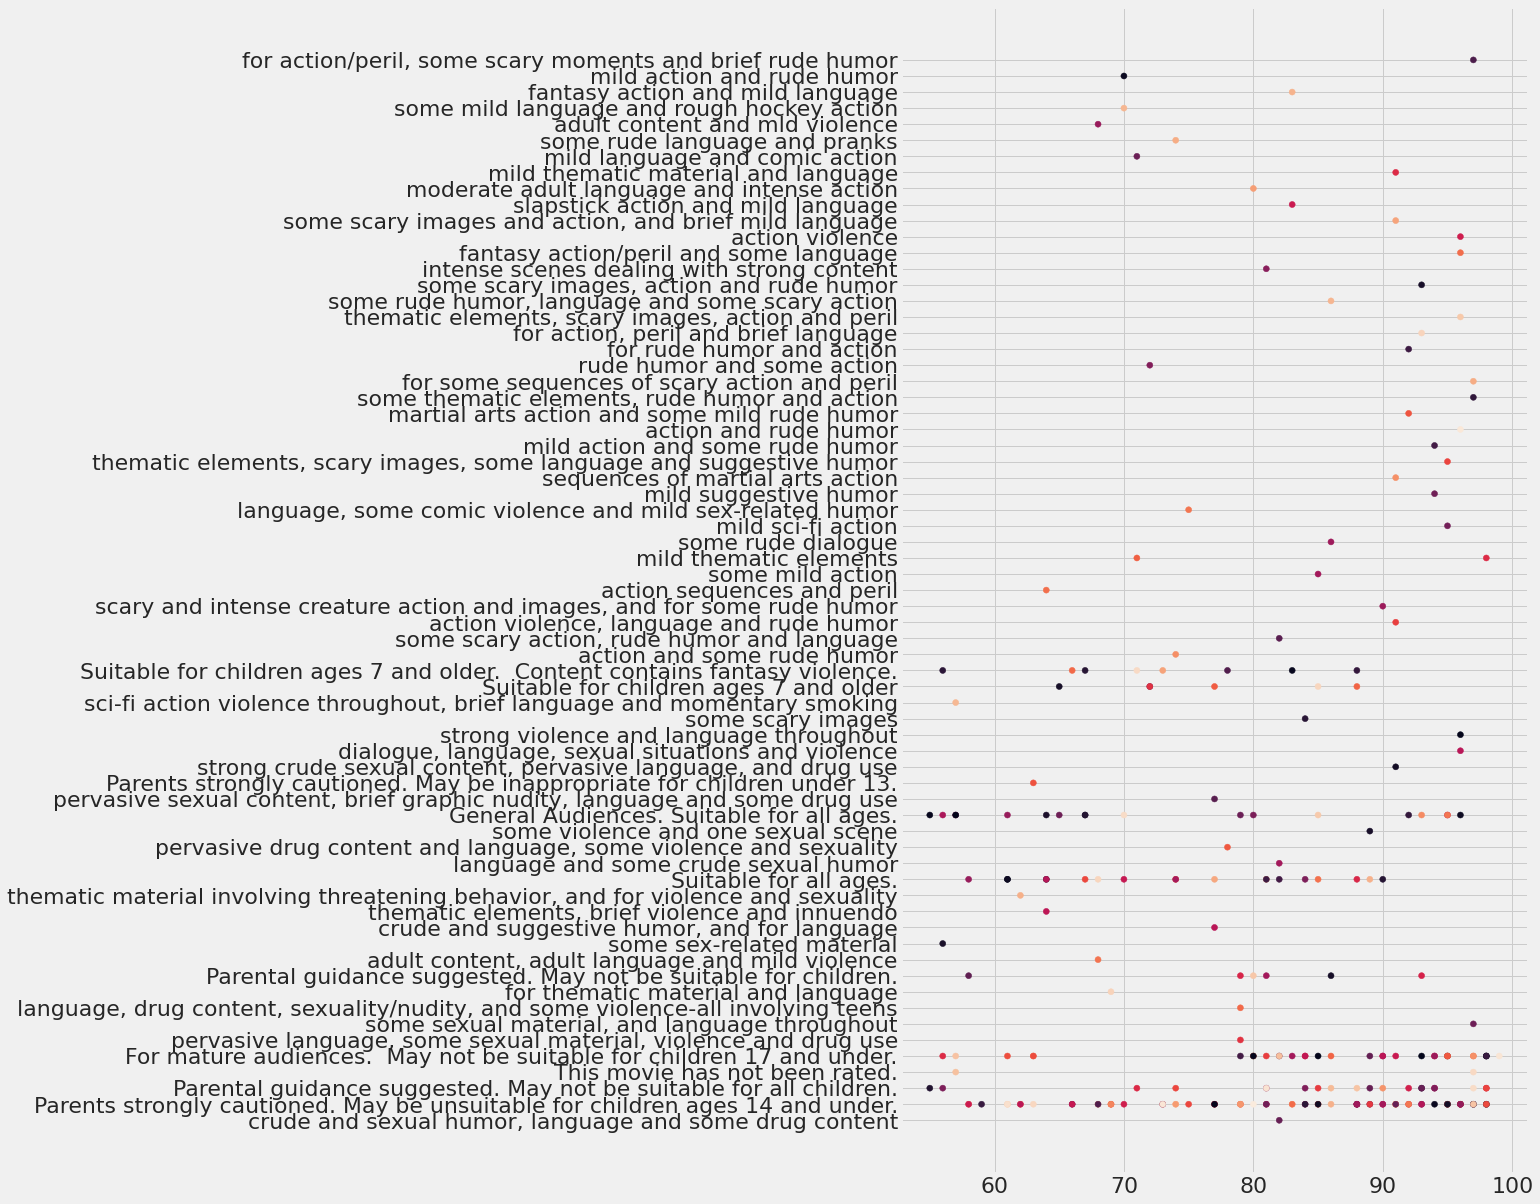

In [ ]:
plt.figure(figsize=(10,20))

plt.scatter(data.dropna()['user_rating_score'], data.dropna()['ratingLevel'], c=np.random.rand(data.dropna()['ratingLevel'].shape[0]))
plt.show()

In [ ]:
data[data.user_rating_score == max(data.user_rating_score)].drop_duplicates(keep='last')

,title,rating,ratingLevel,release_year,user_rating_score
497,13 Reasons Why,TV-MA,For mature audiences. May not be suitable for...,2017,99.0


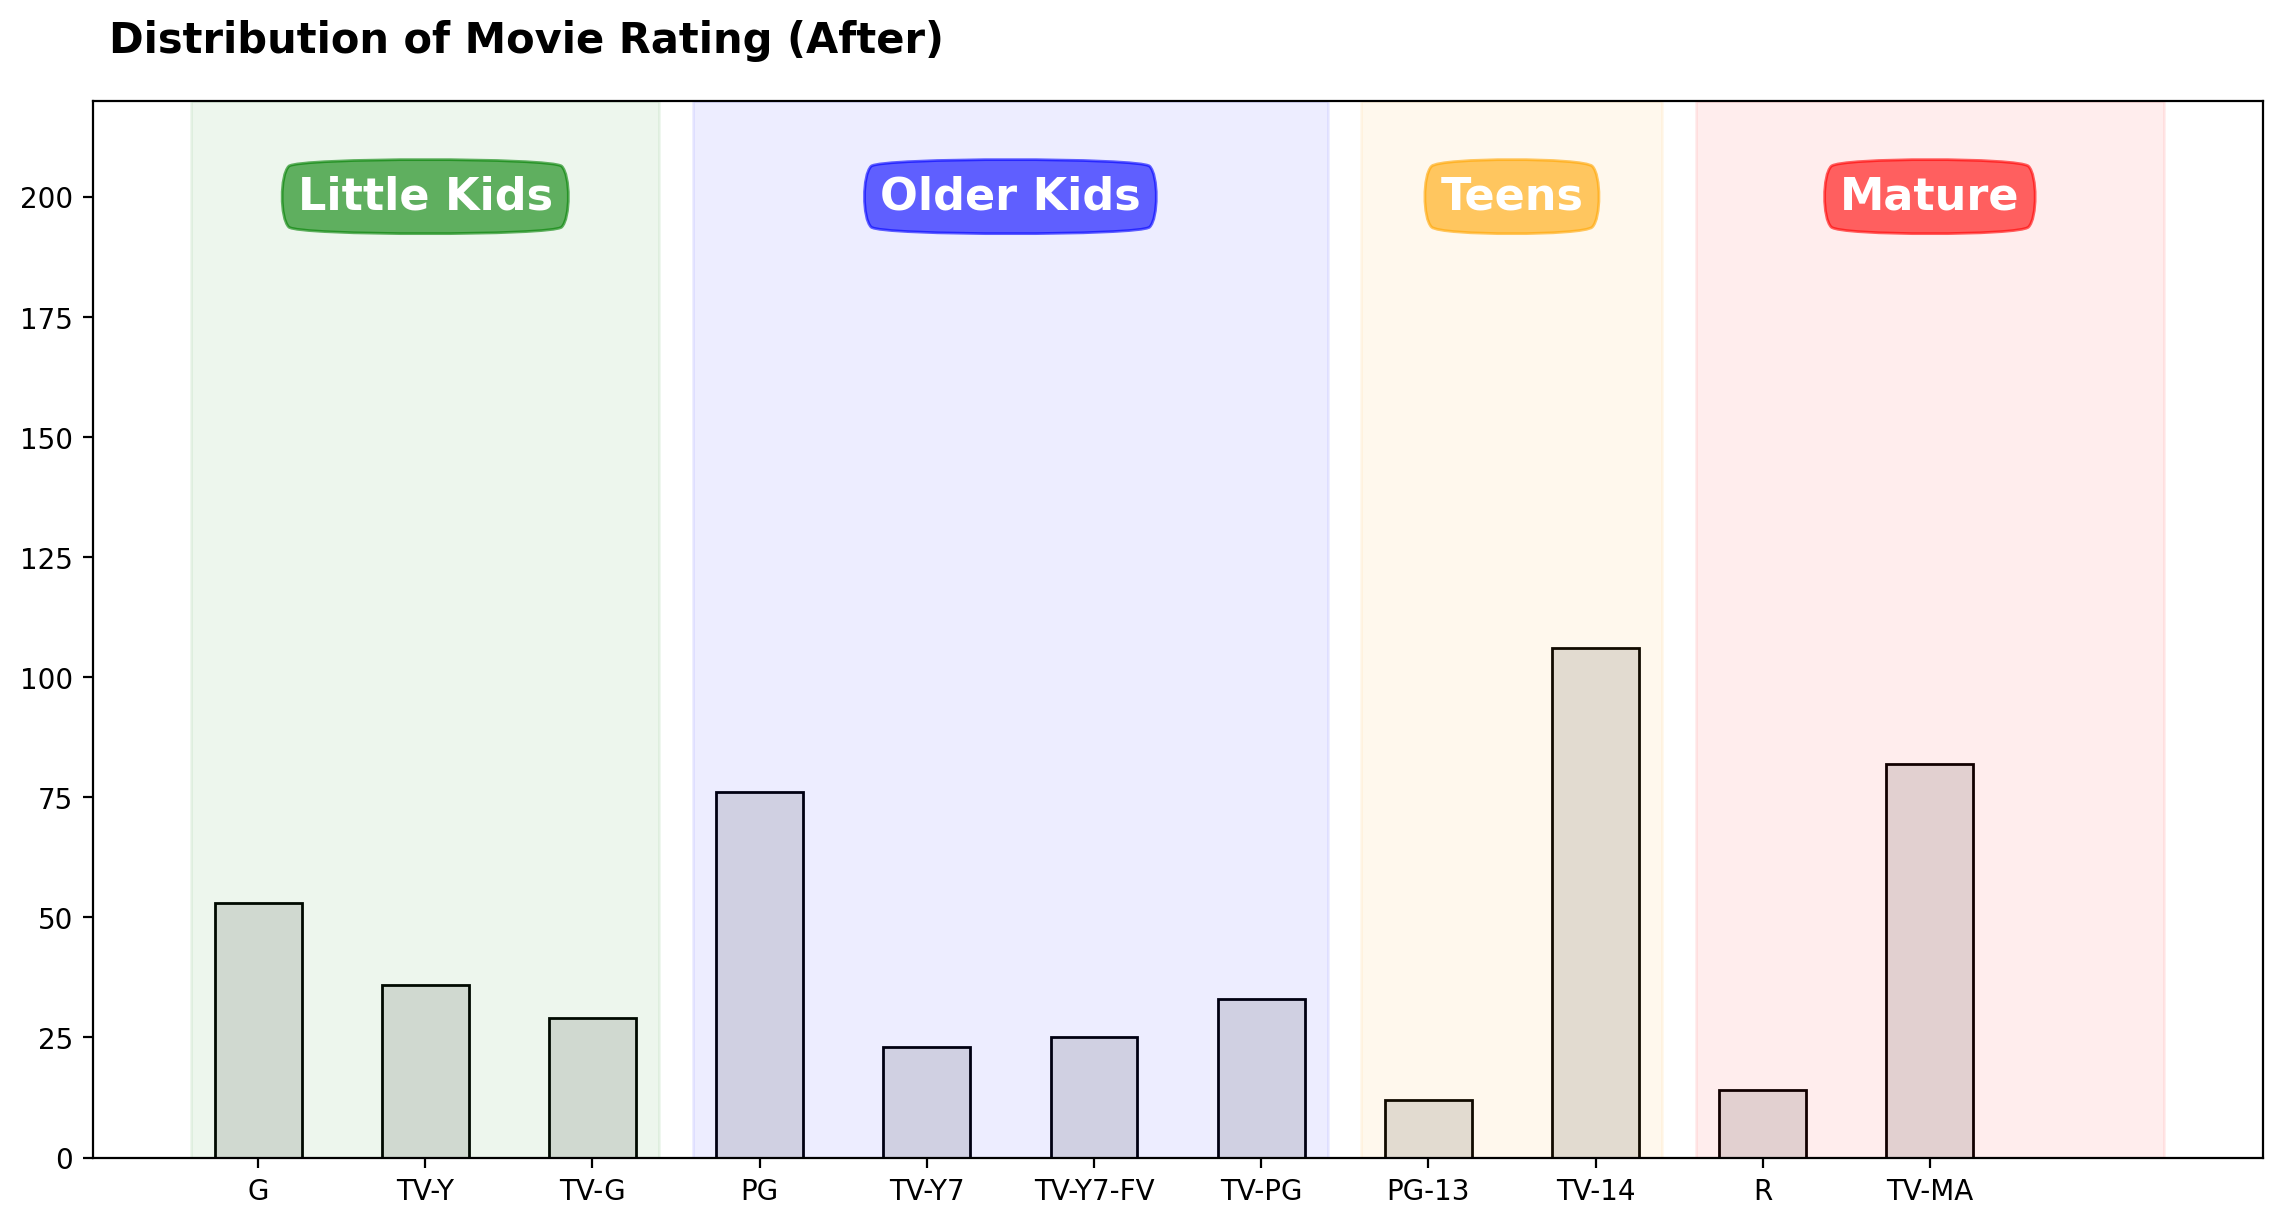

In [ ]:
def rating_barplot(data, title, height, h_lim=None):
    fig, ax = plt.subplots(1,1, figsize=(14, 7), dpi=200)
    if h_lim :
        ax.set_ylim(0, h_lim)
    ax.bar(data.index, data,  color="#e0e0e0", width=0.52, edgecolor='black')

    color =  ['green',  'blue',  'orange',  'red']
    span_range = [[0, 2], [3,  6], [7, 8], [9, 11]]

    for idx, sub_title in enumerate(['Little Kids', 'Older Kids', 'Teens', 'Mature']):
        ax.annotate(sub_title,
                    xy=(sum(span_range[idx])/2 ,height),
                    xytext=(0,0), textcoords='offset points',
                    va="center", ha="center",
                    color="w", fontsize=16, fontweight='bold',
                    bbox=dict(boxstyle='round4', pad=0.4, color=color[idx], alpha=0.6))
        ax.axvspan(span_range[idx][0]-0.4,span_range[idx][1]+0.4,  color=color[idx], alpha=0.07)
    ax.set_title(f'Distribution of {title} Rating (After)', fontsize=15, fontweight='bold', position=(0.20, 1.0+0.03))
    plt.show()
    
movie = data # movie = netflix_titles[netflix_titles['type'] == 'Movie'] 
rating_order =  ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'TV-MA']
movie_rating = movie['rating'].value_counts()[rating_order] 
rating_barplot(movie_rating,'Movie', 200, 220)